# Modelos

In [6]:
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import preprocessing
from matplotlib import pyplot as plt
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn import svm,model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold,SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import  StandardScaler
from imblearn.under_sampling import TomekLinks
from sklearn.utils import shuffle

training = pd.read_csv("training.csv",sep=";")
test= pd.read_csv("test.csv",sep=";")



In [7]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

training[' workclass']= label_encoder.fit_transform(training[' workclass'])
training[' education']= label_encoder.fit_transform(training[' education'])
training[' marital-status']= label_encoder.fit_transform(training[' marital-status'])
training[' occupation']= label_encoder.fit_transform(training[' occupation'])
training[' relationship']= label_encoder.fit_transform(training[' relationship'])
training[' race']= label_encoder.fit_transform(training[' race'])
training[' sex']= label_encoder.fit_transform(training[' sex'])
training[' native-country']= label_encoder.fit_transform(training[' native-country'])
training[' salary-classification']= label_encoder.fit_transform(training[' salary-classification'])



# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

test[' workclass']= label_encoder.fit_transform(test[' workclass'])
test[' education']= label_encoder.fit_transform(test[' education'])
test[' marital-status']= label_encoder.fit_transform(test[' marital-status'])
test[' occupation']= label_encoder.fit_transform(test[' occupation'])
test[' relationship']= label_encoder.fit_transform(test[' relationship'])
test[' race']= label_encoder.fit_transform(test[' race'])
test[' sex']= label_encoder.fit_transform(test[' sex'])
test[' native-country']= label_encoder.fit_transform(test[' native-country'])
test[' salary-classification']= label_encoder.fit_transform(test[' salary-classification'])

In [8]:
training.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [9]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


In [10]:

data = training[['age', ' workclass', ' fnlwgt', ' education', ' education-num', ' marital-status', ' occupation', 
             ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
target = training[' salary-classification']


data_test = test[['age', ' workclass', ' fnlwgt', ' education', ' education-num', ' marital-status', ' occupation', 
             ' relationship', ' race', ' sex', ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country']]
target_test = test[' salary-classification']





In [11]:
def standardScaling2(X_train, X_test): 
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform( X_train )
   # scaled_test = scaler.transform( X_test )
    return scaled_data, X_test;

def tomekSampler(X_train, y_train):
    cc = TomekLinks(sampling_strategy='majority')
    X_balanced, y_train = cc.fit_sample(X_train, y_train)
    X_balanced, y_train = shuffle(X_balanced, y_train)
    return X_balanced, y_train;

In [12]:
#selectkbest
selector = SelectKBest(chi2, k=8) #testar de 1 a 14
fit = selector.fit(data, target)
#features selection
cols = selector.get_support(indices=True)
cols_names = list(data.columns[cols])
selector.get_support(indices=True)


X_train_transformed, X_test_transformed = standardScaling2(data, data_test)
X_train_balanced, y_train_balanced = tomekSampler(data, target)

# Logistic Regression

In [13]:

logmodel = LogisticRegression(max_iter = 100000)
logmodel.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=100000)

In [14]:

predictions = logmodel.predict(data_test)
print(classification_report(target_test,predictions))
print(metrics.accuracy_score(target_test, predictions))
print(confusion_matrix(target_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.93      0.87     12435
           1       0.59      0.33      0.42      3846

    accuracy                           0.79     16281
   macro avg       0.70      0.63      0.64     16281
weighted avg       0.76      0.79      0.76     16281

0.7863767581843867
[[11551   884]
 [ 2594  1252]]


# Support Vector Machines 

In [15]:
svc_model = SVC()
svc_model.fit(X_train_balanced,y_train_balanced)

SVC()

In [16]:
predictions = svc_model.predict(data_test)

print(classification_report(target_test,predictions))
print(metrics.accuracy_score(target_test, predictions))
print(confusion_matrix(target_test, predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     12435
           1       0.96      0.16      0.27      3846

    accuracy                           0.80     16281
   macro avg       0.88      0.58      0.58     16281
weighted avg       0.83      0.80      0.74     16281

0.7998894416804865
[[12412    23]
 [ 3235   611]]


# K Means Clustering

In [19]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_balanced,y_train_balanced)

KMeans(n_clusters=2)

In [20]:

#print(confusion_matrix(target_test,kmeans.labels_))
#print(classification_report(target_test,kmeans.labels_))

predictions = kmeans.predict(data_test)
#print(metrics.accuracy_score(target_test, predictions))


print(classification_report(target_test,predictions))
print(metrics.accuracy_score(target_test, predictions))
print(confusion_matrix(target_test, predictions))


              precision    recall  f1-score   support

           0       0.76      0.74      0.75     12435
           1       0.23      0.26      0.24      3846

    accuracy                           0.62     16281
   macro avg       0.50      0.50      0.50     16281
weighted avg       0.64      0.62      0.63     16281

0.6234875007677662
[[9158 3277]
 [2853  993]]


# K Nearest Neighbors 

The optimal number of neighbors is 2


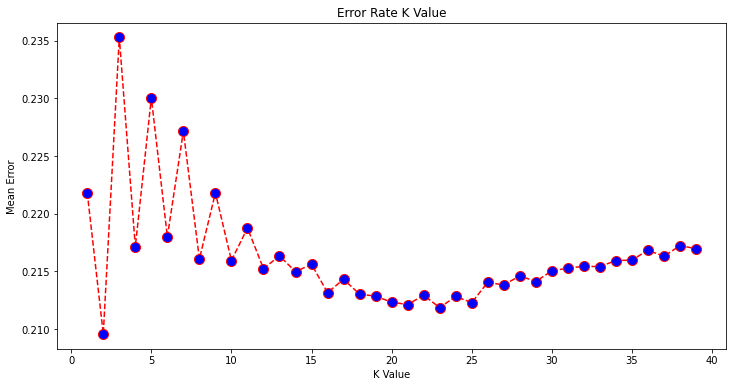

In [21]:
neighbors = list(range(1, 40))

cv_scores = []

# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), mse, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [22]:
# Criar um classificador k-NN com 6 neighbors
knn = KNeighborsClassifier(n_neighbors = 2)

# Treinar o modelo
knn.fit(data, target)

# Predizer a classe para os dados de treinamento
predictions = knn.predict(data_test)


print(classification_report(target_test,predictions))
print(metrics.accuracy_score(target_test, predictions))
print(confusion_matrix(target_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     12435
           1       0.59      0.27      0.37      3846

    accuracy                           0.78     16281
   macro avg       0.70      0.61      0.62     16281
weighted avg       0.76      0.78      0.75     16281

0.7839199066396413
[[11730   705]
 [ 2813  1033]]


# Naive Bayes

In [23]:
model = GaussianNB().fit(X_train_balanced,y_train_balanced)

predictions = model.predict(data_test)
df_new_dt_pred_l = pd.DataFrame({'actual':target_test,'predicted':predictions})
#accuracy_score(df_new_dt_pred_l['actual'],round(df_new_dt_pred_l['predicted']))



print(classification_report(target_test,predictions))
print(metrics.accuracy_score(target_test, predictions))
print(confusion_matrix(target_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88     12435
           1       0.64      0.31      0.41      3846

    accuracy                           0.80     16281
   macro avg       0.73      0.63      0.65     16281
weighted avg       0.77      0.80      0.77     16281

0.7950371598796143
[[11764   671]
 [ 2666  1180]]
